# Распознавание рукописных букв (A–Z) с помощью полносвязной нейросети

В этом проекте мы создаём модель на Keras, которая распознаёт рукописные буквы английского алфавита (A–Z).  
Используем датасет рукописных символов размером 28×28 пикселей, обучаем полносвязную сеть и проверяем её точность.

## 1. Загрузка данных
Данные содержат изображения букв (A–Z), развернутые в векторы размером 784 (28×28).


In [ ]:
import numpy as np
dataset = np.loadtxt('https://storage.yandexcloud.net/academy.ai/A_Z_Handwritten_Data.csv', delimiter=',')

## 2. Подготовка признаков и меток
- `X` — признаки (пиксели изображения)  
- `Y` — метки классов (цифры от 0 до 25, где 0 = A, 25 = Z)


In [12]:
X = dataset[:,1:785]
Y = dataset[:,0]

## 3. Разделение выборки
Делим данные на обучение (80%) и тест (20%) для проверки качества модели.


In [13]:
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.2, shuffle=True)

## 4. Визуализация данных
Посмотрим, как выглядят буквы из обучающей выборки.


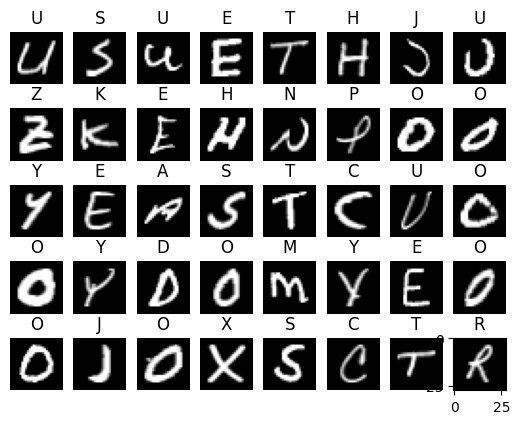

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y',25:'Z'}

for i in range(40):
    x = x_train[i]
    x = x.reshape((28, 28))
    plt.axis('off')
    im = plt.subplot(5, 8, i+1)
    plt.title(word_dict.get(y_train[i]))
    im.imshow(x, cmap='gray')


## 5. Построение модели
Используем простую полносвязную сеть:
- Скрытые слои: 512 и 256 нейронов с ReLU  
- Выходной слой: 26 нейронов (буквы A–Z) с softmax  
- Оптимизатор: RMSprop с `learning_rate=0.0005`


In [15]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(784,)))
model.add(layers.Dense(256, activation = 'relu'))
#model.add(layers.Dense(128, activation = 'relu'))
#model.add(layers.Dense(100, activation = 'relu'))
#model.add(layers.Dense(50, activation = 'relu'))
model.add(layers.Dense(26, activation='softmax'))
opt = optimizers.RMSprop(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

## 6. One-hot кодирование
Преобразуем классы (0–25) в векторы длиной 26 для обучения.


In [16]:
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)

## 7. Обучение модели
Обучаем сеть на 30 эпохах, размер батча = 128.


In [17]:
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - accuracy: 0.7961 - loss: 5.0298 - val_accuracy: 0.9240 - val_loss: 0.3524
Epoch 2/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 24s 10ms/step - accuracy: 0.9324 - loss: 0.3084 - val_accuracy: 0.9485 - val_loss: 0.2536
Epoch 3/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9481 - loss: 0.2458 - val_accuracy: 0.9489 - val_loss: 0.2588
Epoch 4/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 25s 11ms/step - accuracy: 0.9556 - loss: 0.2207 - val_accuracy: 0.9551 - val_loss: 0.2552
Epoch 5/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9605 - loss: 0.1972 - val_accuracy: 0.9559 - val_loss: 0.2418
Epoch 6/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9637 - loss: 0.1868 - val_accuracy: 0.9659 - val_loss: 0.2088
Epoch 7/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.9664 - loss: 0.1764 - val_accuracy: 0.9643 - val_loss: 0.2343
Epoch 8/30
2328/2328 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9679 - los

## 8. Визуализация обучения
Смотрим, как менялись точность и ошибка во время обучения.


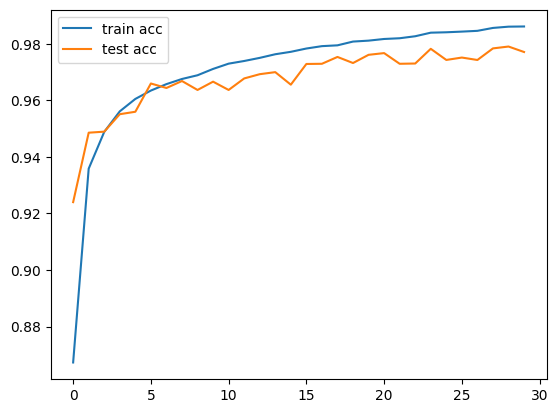

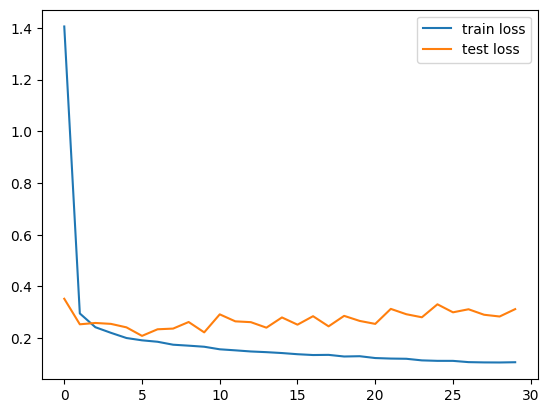

In [18]:
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='test acc')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.legend()
plt.show()

## 9. Оценка модели
Считаем точность на тестовой выборке.


In [19]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_acc:', test_acc)

2328/2328 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9775 - loss: 0.2934
test_acc: 0.9770576357841492


## 📌 Вывод
Мы построили простую полносвязную сеть для распознавания рукописных букв.  
Сеть достигла точности **~97% на тестовой выборке** без использования Dropout и сложных архитектур.  
Это показывает, что даже базовая нейросеть может эффективно решать задачу классификации изображений при правильной настройке параметров.
